In [3]:
%matplotlib inline
import networkx as nx
import itertools as itools
import matplotlib.pyplot as plt

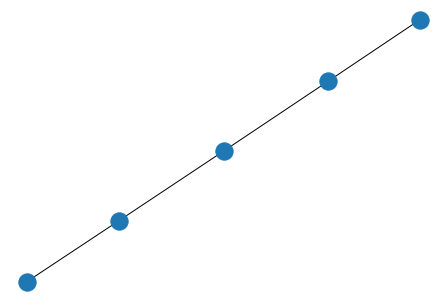

In [4]:
g = nx.Graph()
g.add_nodes_from(["A", "B", "D", "C", "E"])
g.add_edges_from([("A", "B"), ("D", "C"), ("A", "E"), ("C", "E")])
nx.draw(g)

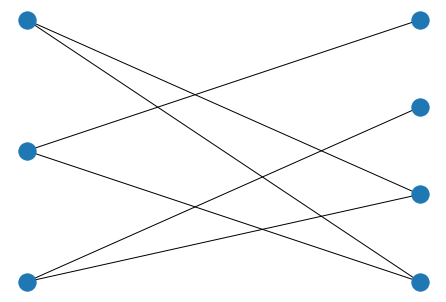

In [5]:
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])
# This line splits the node lists into two sets and selects the second set as the left hand side
# this only affects layout I could have easily selected the first set
top = nx.bipartite.sets(B)[1]
nx.draw(B, nx.bipartite_layout(B, top))

In [4]:
prj_graph = nx.projected_graph(B, [1, 2, 3, 4])

adj_list = []
for n, nbrs in prj_graph.adj.items():
    for nbr, eattr in nbrs.items():
        adj_list += [(n, nbr)]
print(adj_list)

# or if your comfortable with complex list-comprehensions:
adj_list = [(n,nbr) for n, nbrs in prj_graph.adj.items()
                    for nbr, eattr in nbrs.items()]
print(adj_list)

[(1, 2), (1, 4), (2, 1), (2, 3), (3, 2), (4, 1)]
[(1, 2), (1, 4), (2, 1), (2, 3), (3, 2), (4, 1)]


In [5]:
nx.adjacency_matrix(prj_graph).todense()  # To dense simplifies printing but the adjacency matrix is by default sparse

matrix([[0, 1, 0, 1],
        [1, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0]], dtype=int64)

In [6]:
# These are randoms graphs so output will change on successive runs and may not match exactly what's in the slides

G = nx.gnp_random_graph(20, 0.02, directed=True)
print(G.in_degree())

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 4), (7, 0), (8, 0), (9, 1), (10, 0), (11, 0), (12, 1), (13, 1), (14, 2), (15, 0), (16, 1), (17, 0), (18, 0), (19, 1)]


In [7]:
print(G.out_degree())

[(0, 1), (1, 0), (2, 0), (3, 0), (4, 2), (5, 0), (6, 1), (7, 1), (8, 0), (9, 0), (10, 1), (11, 1), (12, 0), (13, 0), (14, 1), (15, 0), (16, 1), (17, 2), (18, 0), (19, 0)]


Text(0.5, 0, 'rank')

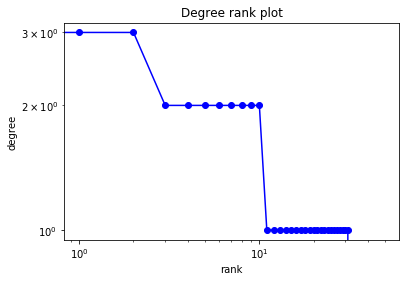

In [8]:
G = nx.gnp_random_graph(50, 0.02, directed=False)
degree_sequence = sorted(dict(G.degree()).values(), reverse=True)
plt.loglog(degree_sequence,'b-',marker='o')
plt.title('Degree rank plot')
plt.ylabel('degree')
plt.xlabel('rank')

In [9]:
G = nx.gnp_random_graph(50,0.06,directed=True)
sg = nx.strongly_connected_components(G)
print([list(l) for l in sg])

[[17], [38], [45], [47], [34], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 39, 40, 41, 42, 43, 44, 46, 48, 49], [10]]


In [10]:
sg = nx.weakly_connected_components(G)
print([list(l) for l in sg])

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]


In [11]:
nx.shortest_path(G, 1, 9)

[1, 37, 8, 42, 21, 9]

In [12]:
nx.density(G)

0.05755102040816327